# 라이브러리 임포트

In [4]:
# 이 셀은 복사 붙여넣기로 하세요
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 샘플 데이터셋

In [33]:
X[:5,1]

array([-9.00472052, -7.84149845,  5.962177  ,  4.72011181, -9.40032537])

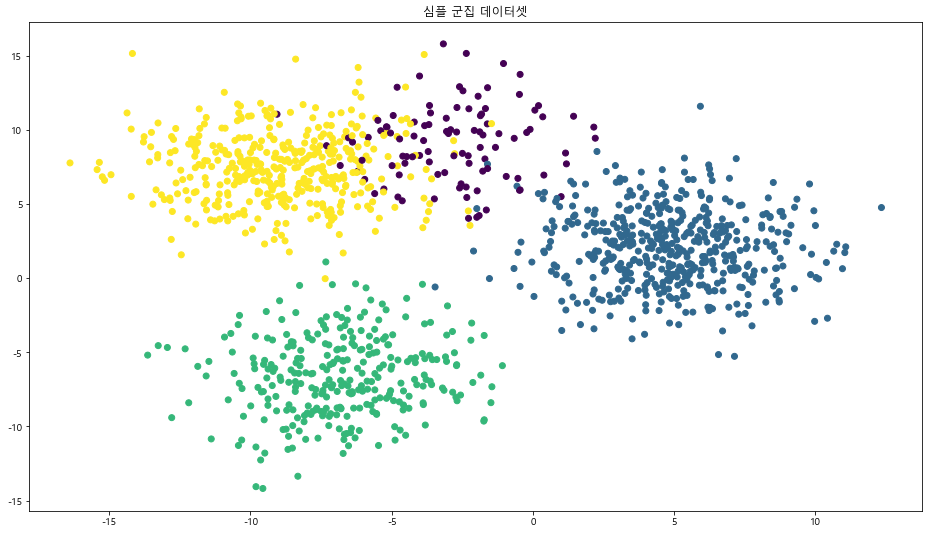

In [44]:
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=[100, 500, 300, 400],
                       cluster_std=2.5,
                       random_state=42)
x = X[:, 0]
y = X[:, 1]

plt.figure(figsize = (16,9))
plt.scatter(x, y, c=labels)
plt.title('심플 군집 데이터셋')
plt.show()

# K-means

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

pred = kmeans.labels_

In [66]:
pd.Series(pred).value_counts()

0    490
3    333
2    301
1    176
dtype: int64

Text(0.5, 1.0, 'KMeans 군집화 결과')

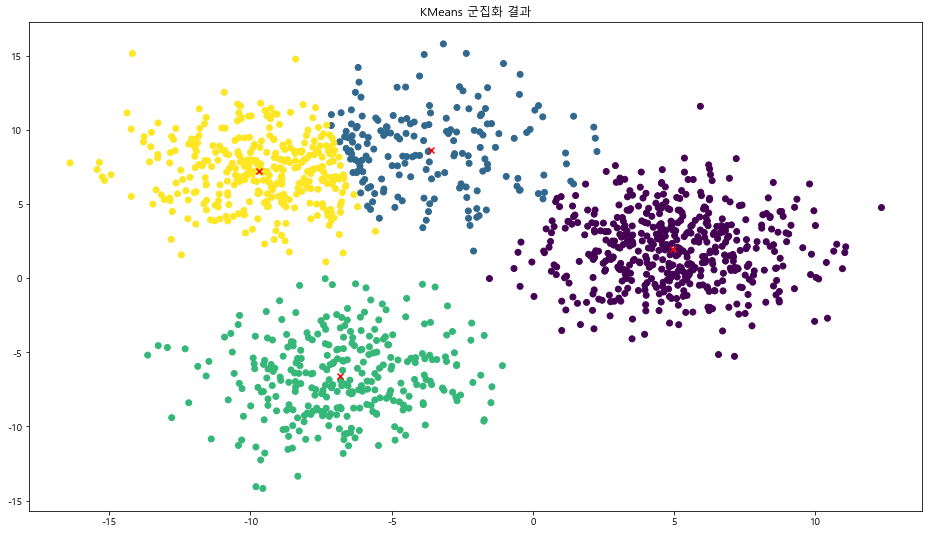

In [70]:
center = kmeans.cluster_centers_

plt.figure(figsize = (16,9))

_ = plt.scatter(x, y, c=pred)
_ = plt.scatter(center[:,0], center[:,1], marker='x', c='red')
plt.title('KMeans 군집화 결과')

Text(0.5, 1.0, '실제 군집 레이블')

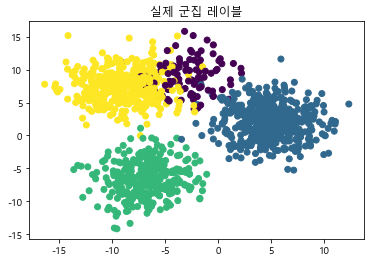

In [72]:
_ = plt.scatter(x, y, c=labels)
plt.title('실제 군집 레이블')

Text(0.5, 1.0, 'KMeans 군집화 결과 (2군집)')

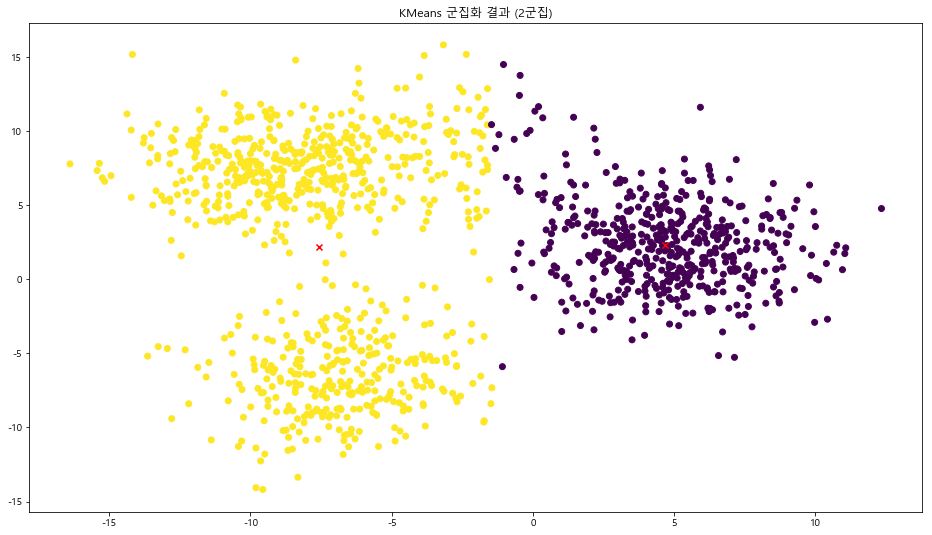

In [167]:
from sklearn.cluster import KMeans
n = 2
kmeans = KMeans(n_clusters=  n)  #n
kmeans.fit(X)
pred = kmeans.labels_
center = kmeans.cluster_centers_

plt.figure(figsize = (16,9))
_ = plt.scatter(x, y, c=pred)
center = kmeans.cluster_centers_
_ = plt.scatter(center[:,0], center[:,1], marker='x', c='red')
plt.title(f'KMeans 군집화 결과 ({n}군집)')  #n

## 최적 군집은 어떻게 정하는가?

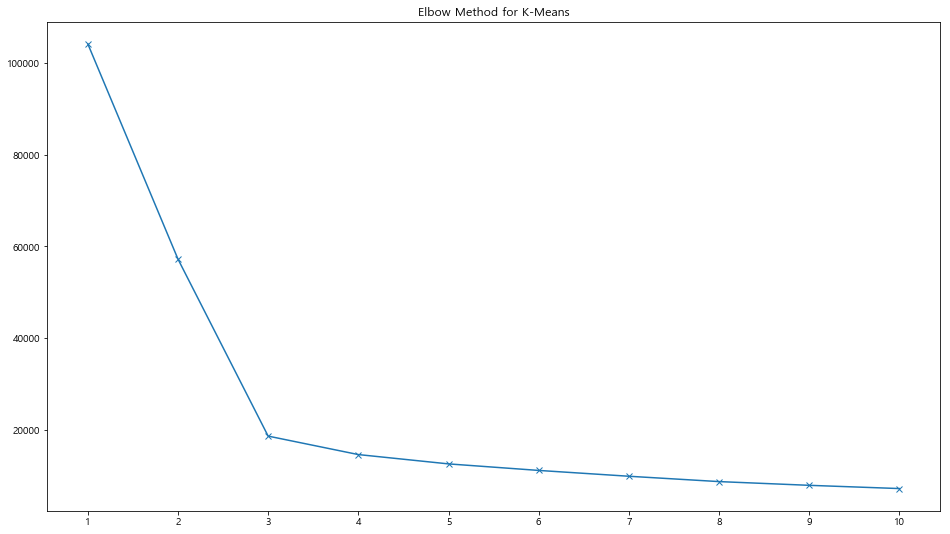

In [110]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (16,9))
plt.plot(K, inertia, '-x')
plt.title('Elbow Method for K-Means')
plt.xticks(K)
plt.show()

In [106]:
kmeans

KMeans(n_clusters=9)

In [ ]:
kmeans.inertia_   # 오차의 정도

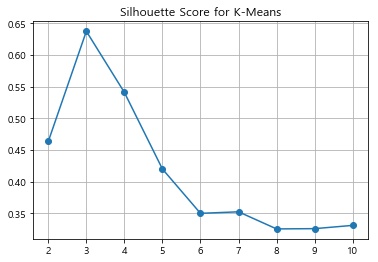

In [118]:
from sklearn.metrics import silhouette_score
sil_score = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(X, labels))
plt.plot(K, sil_score, '-o')
plt.grid(True)
plt.title('Silhouette Score for K-Means')
plt.xticks(K)
plt.show()

In [116]:
X.shape

(1300, 2)

SSE가 급격하게 꺽이는 구간(k=3)  
실루엣 스코어가 최상이 되는 구간(k=3 부근)을 중심으로  
종합적으로 판단하여 k=3개로 군집 갯수를 선정한다

# DBSCAN

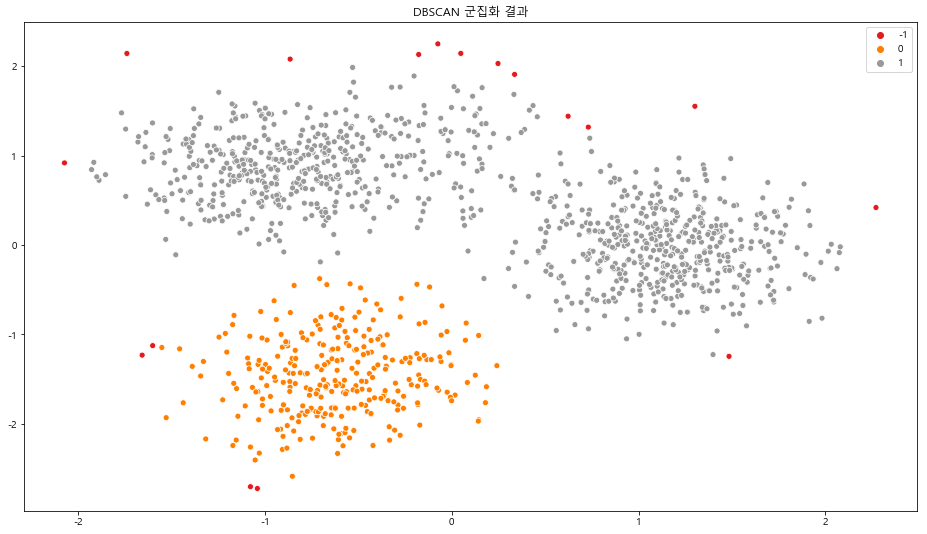

In [155]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.4, min_samples=30) # eps 밀도, # 
# eps가 올라갈수록 군집은 단순해지고, min_samples가 올라갈수 군집 형성이 어려워짐
dbscan.fit(X_scaled)
pred_db = dbscan.labels_
plt.figure(figsize = (16,9))
_= sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],hue=pred_db, palette='Set1')
plt.title('DBSCAN 군집화 결과')
plt.show()

## k-means와 dbscan의 차이점

In [165]:
# kmeans는 중심점을 기반으로 sse를 측정,
# dbscan은 밀도기반으로 군집을 형성한다는 점에서 차이가 있다.
# 이러한 차이는 군집 모양에 영향을 미친다

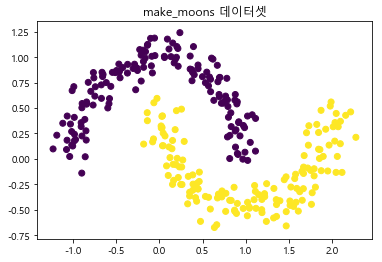

In [171]:
from sklearn.datasets import make_moons
X, labels = make_moons(n_samples=300, noise=0.1, random_state=42)
x = X[:, 0]
y = X[:, 1]
plt.scatter(x, y, c=labels)
plt.title('make_moons 데이터셋')
plt.show()

Text(0.5, 1.0, 'KMeans 군집화 결과 (k=2)')

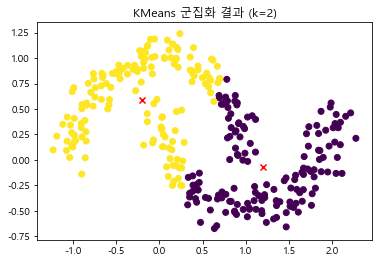

In [173]:
# kmeans k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
pred = kmeans.labels_

plt.scatter(x, y, c=pred)

center = kmeans.cluster_centers_
_ = plt.scatter(center[:,0], center[:,1], marker='x', c='red')

plt.title('KMeans 군집화 결과 (k=2)')

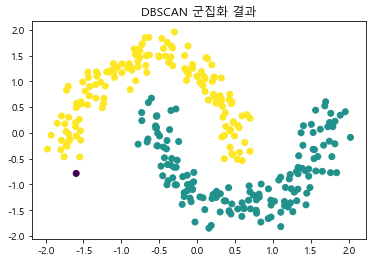

In [175]:
# dbscan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(X_scaled)
pred = dbscan.labels_
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred)
plt.title('DBSCAN 군집화 결과')
plt.show()

# PCA

In [6]:
# 스위스롤
# PCA는 데이터 분산을 가장 잘 보존하는 주성분을 찾아,
# 그 축에 데이터를 투영하여 차원을 축소한다.
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

Text(0.5, 0.92, '스위스롤 데이터셋')

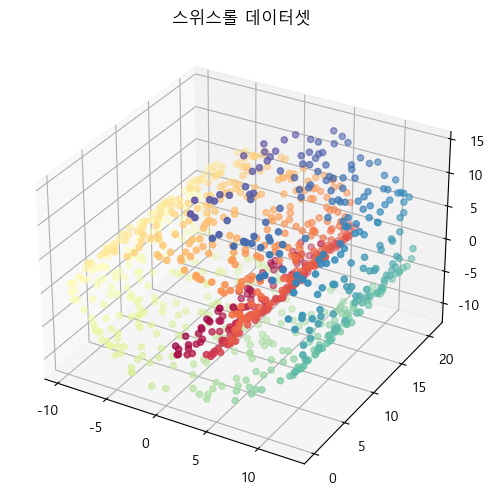

In [8]:
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=t, cmap='Spectral')
ax.set_title('스위스롤 데이터셋')

In [14]:
X

array([[-3.20897292,  4.07488802,  7.66320582],
       [ 6.04241547, 11.41888131, 12.47509711],
       [ 6.68316312, 18.24503328, -9.66312559],
       ...,
       [ 5.97479848,  1.44453579, -1.68932001],
       [ 6.01936003,  1.14500369, 12.33159299],
       [-7.97414459,  5.76914263,  4.42778193]])

In [18]:
X_pca

array([[  2.05320622,   9.87061247],
       [ 12.35855223,   3.96270778],
       [ -4.06756312, -11.04030439],
       ...,
       [ -0.68223718,  -2.2579759 ],
       [ 10.61116858,   6.04952696],
       [ -3.00290647,  11.31858812]])

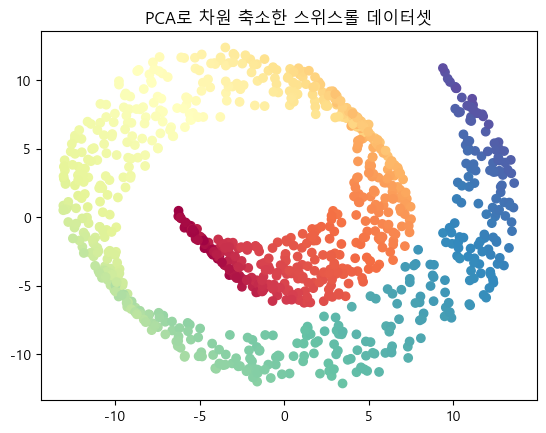

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=t, cmap='Spectral')
plt.title('PCA로 차원 축소한 스위스롤 데이터셋')
plt.show()

# T-SNE

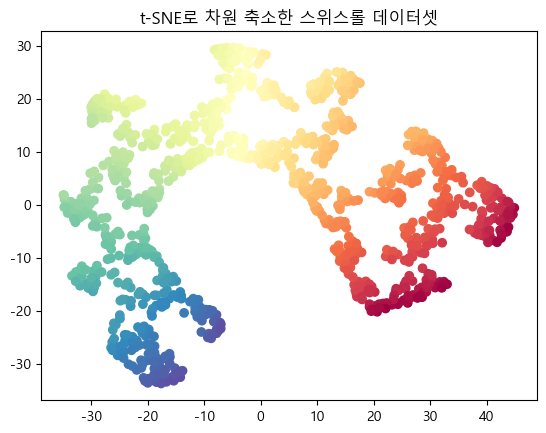

In [196]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)


plt.scatter(X_tsne[:,0], X_tsne[:,1], c=t, cmap='Spectral')
plt.title('t-SNE로 차원 축소한 스위스롤 데이터셋')
plt.show()

# 실습-

In [43]:
# 캘리포니아 데이터셋 -복붙하세요
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['MedHouseVal'] = y
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


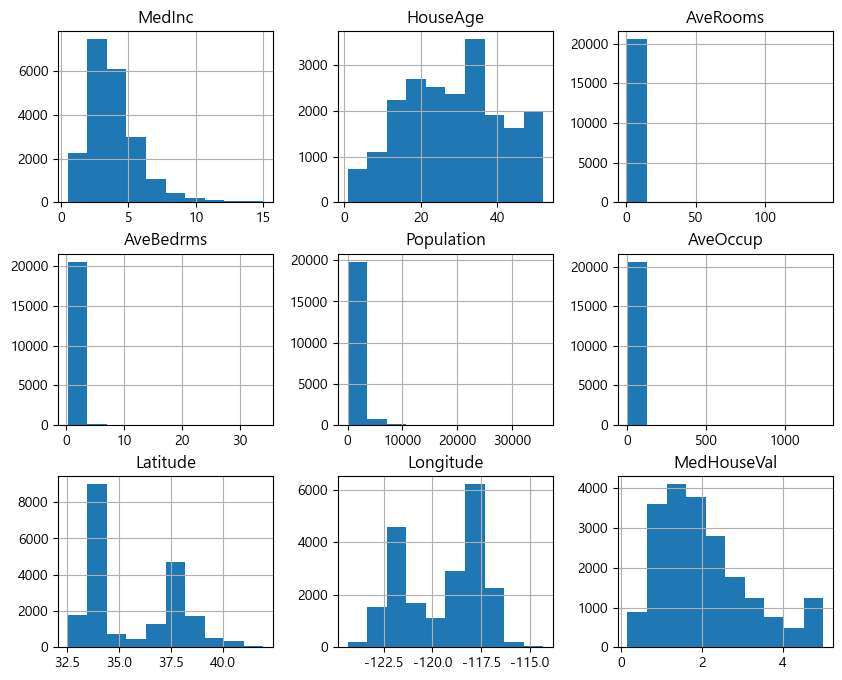

In [14]:
_ = df.hist(figsize=(10,8))

In [15]:
# 로그변환
df.columns
cols = ['MedInc',  'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for col in cols:
    df[col] = np.log1p(df[col])

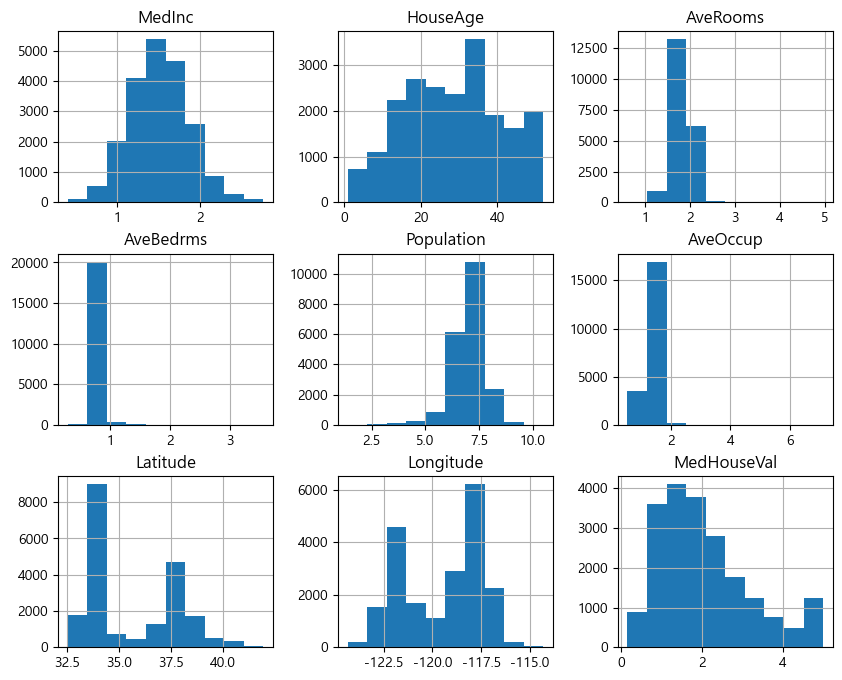

In [16]:
_ = df.hist(figsize=(10,8))

<Axes: >

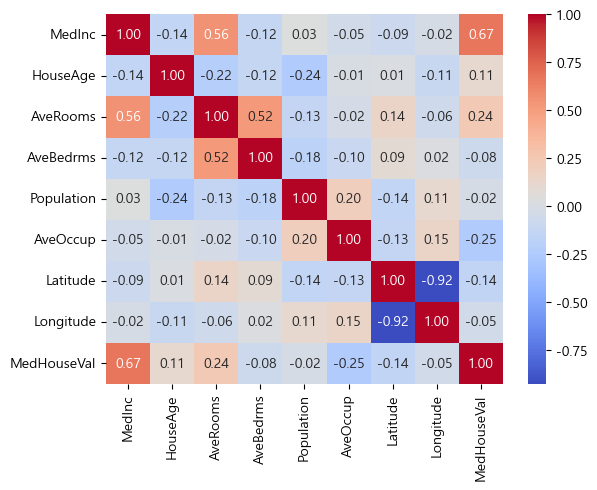

In [18]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

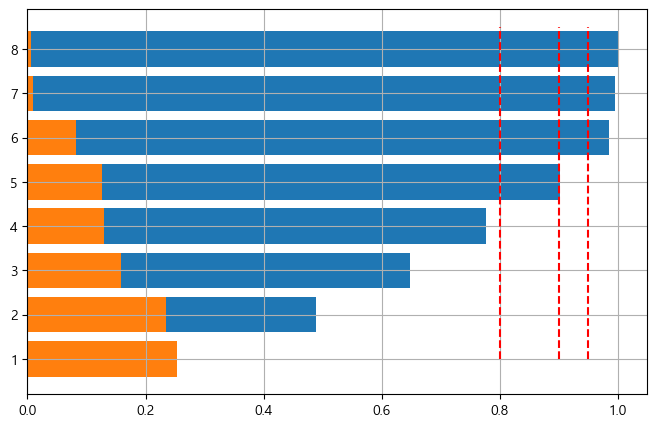

In [40]:
#pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumsum_explained_variance = explained_variance.cumsum()
plt.figure(figsize=(8,5))
plt.grid(True)
plt.barh(range(1,9), cumsum_explained_variance)
plt.barh(range(1,9), explained_variance)
plt.vlines(x=0.80, ymin=1, ymax=8.5, colors='r', linestyles='--')
plt.vlines(x=0.90, ymin=1, ymax=8.5, colors='r', linestyles='--')
plt.vlines(x=0.95, ymin=1, ymax=8.5, colors='r', linestyles='--')
plt.show()

* 최적 PCA component는 6으로 정할 수 있다.

In [42]:
# 캘리포니아 데이터 군집화

In [46]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels


In [ ]:
# 군집화 후 특성별 평균값 확인
df_cluster = df.groupby('Cluster').mean().sort_values(by='Longitude')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
Cluster,,,,,,,,,
3,10.226400,45.000000,3.166667,0.833333,7460.000000,1243.333333,38.320000,-121.980000,1.375000
4,3.558712,29.831538,5.361076,1.076524,1170.571429,2.771528,37.986846,-121.748554,1.883460
0,7.687146,22.549605,8.825209,1.390572,1151.199549,2.923079,34.887576,-118.906285,3.626064
2,3.929385,15.484286,5.305648,1.077166,4313.637143,4.227250,34.792964,-118.703436,1.942489
1,3.411404,30.707185,4.874063,1.061710,1263.410819,3.045814,33.952001,-118.024000,1.951015


In [ ]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


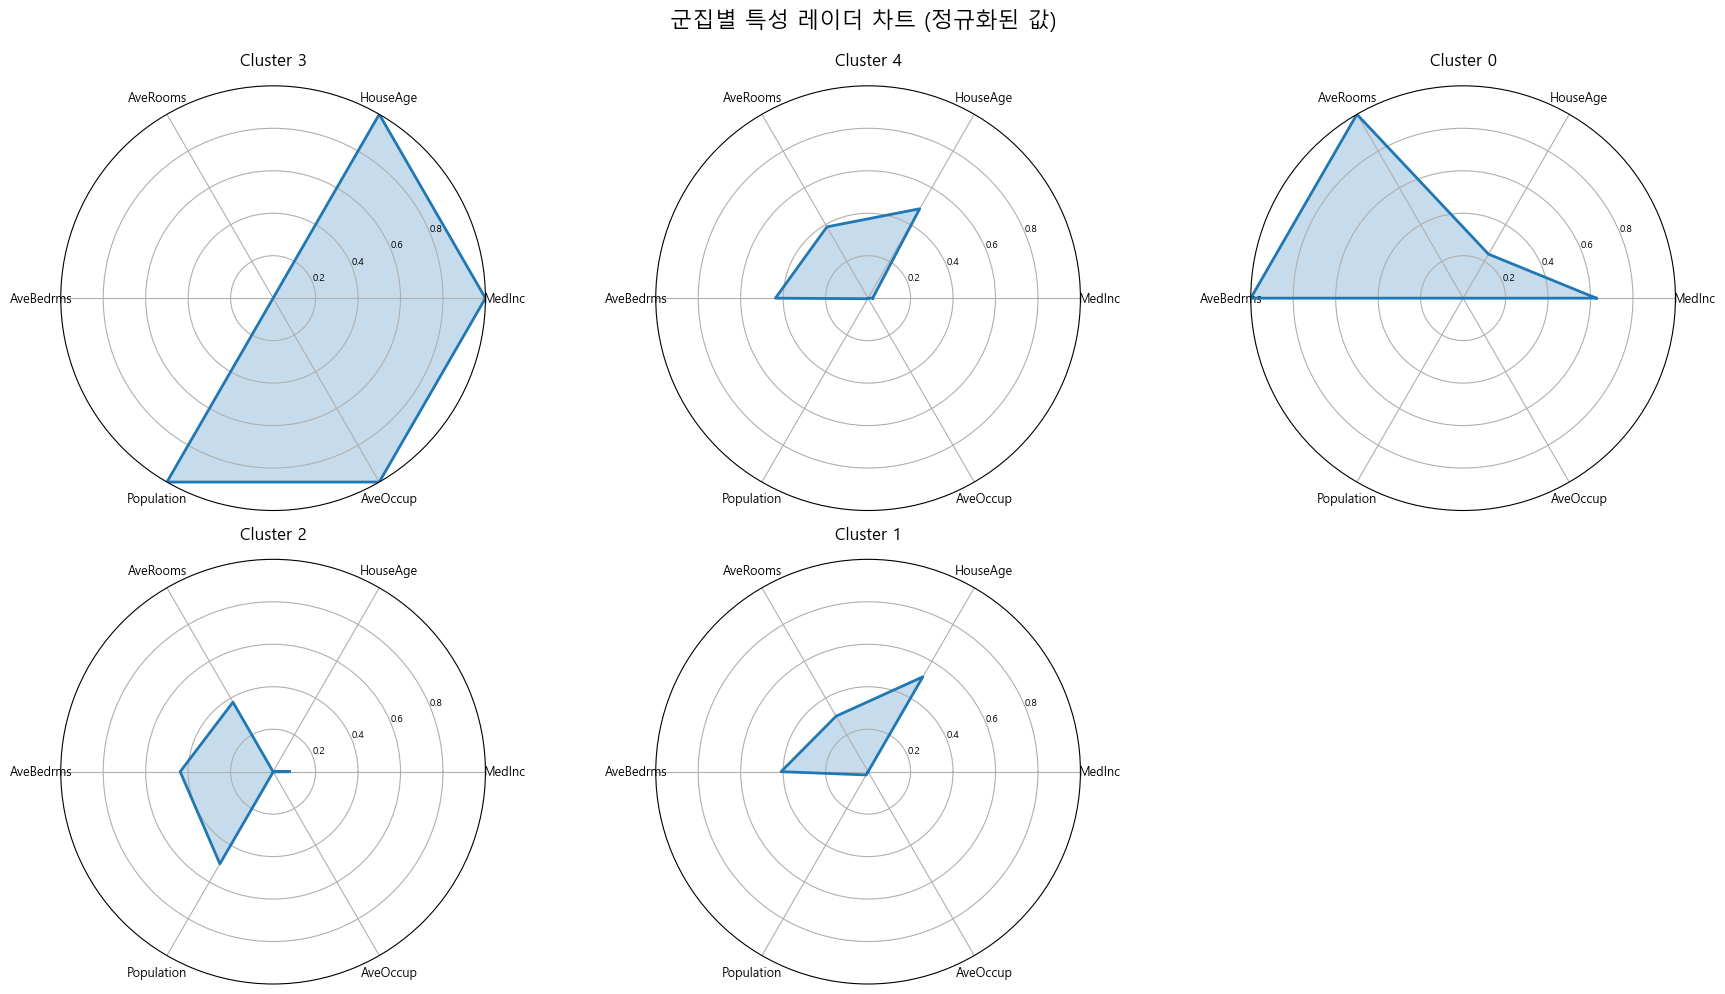

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

# 1) 사용할 변수 선택
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df_feat = df_cluster[features].copy()  # df_cluster는 이미 있다고 가정

# 2) Min-Max 정규화 (0~1)
scaler = MinMaxScaler()
df_norm = pd.DataFrame(
    scaler.fit_transform(df_feat),
    columns=features,
    index=df_feat.index
)

# 3) 레이더 차트용 각도 계산
N = len(features)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate([angles, [angles[0]]])  # 도형 닫기

clusters = df_norm.index.tolist()
n_clusters = len(clusters)

# 서브플롯 배치: 2열로 배치 (원하면 바꿔도 됨)
n_cols = 3
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    subplot_kw={'polar': True},
    figsize=(6 * n_cols, 5 * n_rows)
)

# axes를 1차원 리스트로 평탄화
axes = np.array(axes).reshape(-1)

for ax, cluster in zip(axes, clusters):
    row = df_norm.loc[cluster]
    values = row.values.tolist()
    values += values[:1]  # 시작값 다시 붙여서 닫기

    # 레이더 선 + 채우기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 축 설정
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=9)

    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8'], fontsize=7)
    ax.set_ylim(0, 1)

    ax.set_title(f'Cluster {cluster}', pad=15, fontsize=12)

# 남는 서브플롯 있으면 지우기 (군집 개수가 2, 3, 5개일 때 등)
for i in range(len(clusters), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('군집별 특성 레이더 차트 (정규화된 값)', fontsize=16, y=0.99)
plt.tight_layout()
plt.show()
